# Data Analysis


In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.spatial import ConvexHull

In [2]:
dtypes = {
u'Ind_ID' : np.float,
u'Exp_Num' : np.str, 
u'Exp_type' : np.str, 
u'probability' : np.float,
u'lifetime': np.float,
u'euclideanStep': np.float,
u'manhattanStep': np.float,
u'euclideanTotal': np.float,
u'manhattanTotal': np.float,
u'euclideanStepAlt': np.float,
u'manhattanStepAlt': np.float,
u'euclideanTotalAlt': np.float,
u'manhattanTotalAlt': np.float,
u'absCellCountFat': np.float,
u'absCellCountMuscle': np.float,
u'absCellCountBone': np.float,
u'absCellCount': np.float,
u'relCellCountFat': np.float,
u'relCellCountMuscle': np.float,
u'relCellCountBone': np.float,
u'absCellCountFatAlt': np.float,
u'absCellCountMuscleAlt': np.float,
u'absCellCountBoneAlt': np.float,
u'absCellCountAlt': np.float,
u'relCellCountFatAlt': np.float,
u'relCellCountMuscleAlt': np.float,
u'relCellCountBoneAlt': np.float,
u'sizeXmax': np.float,
u'sizeYmax': np.float,
u'sizeZmax': np.float,
u'sizeXmin': np.float,
u'sizeYmin': np.float,
u'sizeZmin': np.float,
u'relHeight': np.float,
u'muscleBottom': np.float,
u'muscleTop': np.float,
u'muscleCenter': np.float,
u'muscleOuter': np.float,
u'muscleCenterRel': np.float,
u'muscleOuterRel': np.float,
u'symmetricMuscleSame': np.float,
u'symmetricMuscleOpposite': np.float,
u'symmetricMuscleMissing': np.float,
u'traceArcRadius': np.float,
u'traceArcPercent': np.float,
u'monotonyX': np.float,
u'monotonyY': np.float,
u'gaitPeriodX': np.float,
u'gaitErrorX': np.float,
u'gaitPeriodY': np.float,
u'gaitErrorY': np.float,
u'gaitPeriodZ': np.float,
u'gaitErrorZ': np.float,
u'hullRatio': np.float,
u'triangles': np.float,
u'limbs': np.float,
u'shapeComplexity': np.float,
u'CompositionEntropy': np.float,
u'Arena_Size': np.str,
u'birthtime' : np.float,
}

The experiments are clipped to 2000 individuals each, because the experiments because the experiments on the smaller arena only have 2000 individuals. In places where the effects of the other individuals might be useful they will be shown.

In [3]:
df_bigger = pd.read_csv('data.csv', na_values=['NA','N','A'], dtype=dtypes)
df_bigger = df_bigger[df_bigger.Ind_ID < 5000]

df_smaller_with = pd.read_csv('data_fgolemo_2016-01-11.csv', na_values=['NA', 'N', 'A'], dtype=dtypes)
df_smaller_without = pd.read_csv('data_jheinerm_2016-01-11.csv', na_values=['NA','N','A'], dtype=dtypes)
df_smaller = pd.concat([df_smaller_with, df_smaller_without])
df_smaller = df_smaller[df_smaller.Ind_ID < 5000]

df_bigger['Arena_Size'] = 'big'
df_smaller['Arena_Size'] = 'small'
df = pd.concat([df_bigger[df_bigger.Ind_ID < 2000], df_smaller])

df['deathtime'] = df.lifetime + df.birthtime

Can we use individual ID as proxy for generation/birthtime?

/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


NameError: name 'set_alpha_axes' is not defined

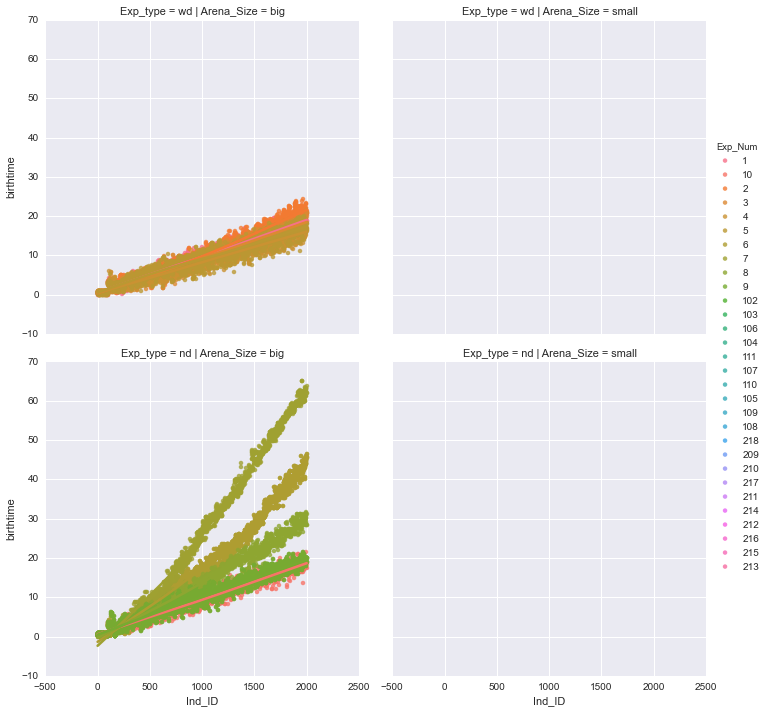

In [4]:
FG = sns.lmplot(data=df, x='Ind_ID', y='birthtime', lowess=True, hue='Exp_Num', col='Arena_Size', row='Exp_type')

set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,75));

I think it makes more sense to use individual id as a proxy for which generation a individual is part of than to use birthtime. Birth time varies wildly between individuals of different experiments, eventhough they are part of the 'same generation'. Because of this Individual ID gives us a way better statistic to use in regressions.

Worrysome is the fact the the birthtimes vary so wildly between experiments, not sure what the explanation is. Individuals are further apart so less individuals are being born? It only occurs in the experiments without disease?

## Shape complexity
These plots show the Shape Complexity over time (Using Individual id as a proxy for time). Literature shows that complexity in a evolutionary system increases over time [? No reference yet but heard Evert say something to this extent] 

All regression lines shown in this notebook are made using `lowess` regression, which might be seen as a locally weighted linear regession. [1]

[1] - Cleveland, W.S. (1979) “Robust Locally Weighted Regression and Smoothing Scatterplots”. Journal of the American Statistical Association 74 (368): 829-836.

In [ ]:
def set_alpha_axes(axes, alpha_level):
    for axis in axes:
        for ax in axis:
            for handle in ax.get_legend_handles_labels()[0]:
                handle.set_alpha(alpha_level)

def set_limits_axes(axes, xlim, ylim):
    for axis in axes:
        for ax in axis:
            ax.set_xlim(*xlim)
            ax.set_ylim(*ylim)

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='shapeComplexity', lowess=True, hue='Exp_type')

set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,2));

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='shapeComplexity', lowess=True, hue='Exp_type', col='Arena_Size')

set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,2));

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='shapeComplexity', lowess=True, hue='Exp_Num', row='Arena_Size', col='Exp_type')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,2));

In [ ]:
df_small = df[df.Arena_Size == 'small']
df_small_without = df_small[df_small.Exp_type == 'nd']
df_small_with = df_small[df_small.Exp_type == 'wd']

df_big = df[df.Arena_Size == 'big']
df_big_without = df_big[df_big.Exp_type == 'nd']
df_big_with = df_big[df_big.Exp_type == 'wd']

df_without = df[df.Exp_type == 'nd']
df_with = df[df.Exp_type == 'wd']

### Statistical significance
Using two-sample Kolmogorov-Smirnov tests on the Shape complexities of the different samples.

In [ ]:
def ks_2sample_print(data_a, data_b):
    p = stats.ks_2samp(data_a, data_b)[1]
    print 'p-value:', p
    print 'statistically significant :', p < 0.05
    print

In [ ]:
print 'All experiments : without disease vs with disease'
ks_2sample_print(df_without.shapeComplexity, df_with.shapeComplexity)

print 'All experiments : first 100 of every experiment (without disease vs with disease) from same distribution? '
ks_2sample_print(df_without[df_without.Ind_ID <= 100].shapeComplexity, df_with[df_with.Ind_ID <= 100].shapeComplexity)

print 'All experiments : last 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_without[df_without.Ind_ID >= 1900].shapeComplexity, df_with[df_with.Ind_ID >= 1900].shapeComplexity)


print 80*'-'
print

print 'Big arena : without disease vs with disease'
ks_2sample_print(df_big_without.shapeComplexity, df_big_with.shapeComplexity)

print 'Big arena, first 100 of every experiment (without disease vs with disease) from same distribution? '
ks_2sample_print(df_big_without[df_big_without.Ind_ID <= 100].shapeComplexity, df_big_with[df_big_with.Ind_ID <= 100].shapeComplexity)

print 'Big arena, last 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_big_without[df_big_without.Ind_ID >= 1900].shapeComplexity, df_big_with[df_big_with.Ind_ID >= 1900].shapeComplexity)

print 80*'-'
print


print 'Small arena : without disease vs with disease'
ks_2sample_print(df_small_without.shapeComplexity, df_small_with.shapeComplexity)

print 'Small arena, first 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_small_without[df_small_without.Ind_ID <= 100].shapeComplexity, df_small_with[df_small_with.Ind_ID <= 100].shapeComplexity)

print 'Small arena, last 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_small_without[df_small_without.Ind_ID >= 1900].shapeComplexity, df_small_with[df_small_with.Ind_ID >= 1900].shapeComplexity)

print 80*'-'
print

print 'Big without vs small without disease'
ks_2sample_print(df_big_without.shapeComplexity, df_small_without.shapeComplexity) 

print 'Big with vs small with disease'
ks_2sample_print(df_big_with.shapeComplexity, df_small_with.shapeComplexity)

Shows that the shape complexity decreases over time, i.e. it tends to go for square shapes.
- Start is are not significantly different (Great!)
- Same distribution in the end (for big arena) shows that with and without disease end up at the same complexity in shape
    
Evolutionary bloat is occuring. It is easy to go from small shapes to large ones but hard to evolve back to small shapes. (Heard about this in class about Genetic Programming, not sure whether this is also the case in Evolutionary systems). Given room individuals would probably grow even bigger than 10x10x10.

Shown in the following figure is the number of cells of the individuals over time:

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='absCellCount', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,1000))

FG = sns.lmplot(data=df, x='Ind_ID', y='absCellCount', lowess=True, hue='Exp_Num', col='Arena_Size', row='Exp_type', legend=False)
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,1000));

Same figure of the experiments with bigger arena but not clipped to 2000 individuals

In [ ]:
FG = sns.lmplot(data=df_bigger, x='Ind_ID', y='absCellCount', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,5000), (0,1000));

### Relationship of cellcount vs shape complexity

In [ ]:
FG = sns.lmplot(data=df, x='absCellCount', y='shapeComplexity', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,1000), (0,2));

The average size of the softbots climbs very quickly which explains the decrease of the shape complexity. This should also mean that the number of limbs and the number of triangles should also go down.

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='hullRatio', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,1));

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='triangles', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,100));

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='limbs', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,10));

Which they do. All tend to the lowest value possible, 0, 12 and 1 respectively.

This shows that the complexity of the shapes tends to go down over time. It seems that having the disease in the environment has no visible impact on the complexity of the shapes. Something that is explained by the fact that the disease itself has no impact on shape but solely on tissue types.

### Shape vs Distance

How do the shape and distance relate?

In [ ]:
FG = sns.lmplot(data=df, x='shapeComplexity', y='euclideanStep', hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.5)
set_limits_axes(FG.axes, (0.02,1.5), (-0.1, 16.5));

In [ ]:
print 'Kendall tau b correlation:'
df[['shapeComplexity','euclideanStep']].corr(method='kendall')

There is no real impact of shape complexity on the distance a individual makes. 

### Tissue Complexity

This plot shows the Tissue Complexity over time (Using Individual id as a proxy for time). Will individuals in a world with the disease adapt to this and have different tissue complexities?

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='CompositionEntropy', lowess=True, hue='Exp_type')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,2.5))

FG = sns.lmplot(data=df, x='Ind_ID', y='CompositionEntropy', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,2.5));

In [ ]:
FG = sns.lmplot(data=df, x='Ind_ID', y='CompositionEntropy', lowess=True, hue='Exp_Num', col='Arena_Size', row='Exp_type')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (0,2000), (0,2.5));

In [ ]:
print 'All experiments : without disease vs with disease'
ks_2sample_print(df_without.CompositionEntropy, df_with.CompositionEntropy)

print 'All experiments : first 100 of every experiment (without disease vs with disease) from same distribution? '
ks_2sample_print(df_without[df_without.Ind_ID <= 100].CompositionEntropy, df_with[df_with.Ind_ID <= 100].CompositionEntropy)

print 'All experiments : last 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_without[df_without.Ind_ID >= 1900].CompositionEntropy, df_with[df_with.Ind_ID >= 1900].CompositionEntropy)


print 80*'-'
print

print 'Big arena : without disease vs with disease'
ks_2sample_print(df_big_without.CompositionEntropy, df_big_with.CompositionEntropy)

print 'Big arena, first 100 of every experiment (without disease vs with disease) from same distribution? '
ks_2sample_print(df_big_without[df_big_without.Ind_ID <= 100].CompositionEntropy, df_big_with[df_big_with.Ind_ID <= 100].CompositionEntropy)

print 'Big arena, last 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_big_without[df_big_without.Ind_ID >= 1900].CompositionEntropy, df_big_with[df_big_with.Ind_ID >= 1900].CompositionEntropy)

print 80*'-'
print


print 'Small arena : without disease vs with disease'
ks_2sample_print(df_small_without.CompositionEntropy, df_small_with.CompositionEntropy)

print 'Small arena, first 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_small_without[df_small_without.Ind_ID <= 100].CompositionEntropy, df_small_with[df_small_with.Ind_ID <= 100].CompositionEntropy)

print 'Small arena, last 100 of every experiment (without disease vs with disease) from same distribution?'
ks_2sample_print(df_small_without[df_small_without.Ind_ID >= 1900].CompositionEntropy, df_small_with[df_small_with.Ind_ID >= 1900].CompositionEntropy)

print 80*'-'
print

print 'Big without vs small without disease'
ks_2sample_print(df_big_without.CompositionEntropy, df_small_without.CompositionEntropy) 

print 'Big with vs small with disease'
ks_2sample_print(df_big_with.CompositionEntropy, df_small_with.CompositionEntropy)


Disease has a lot bigger impact on the tissue complexity than on shape complexity. This is due to the fact that they (probably) compensate for the fact that some muscles turn into bone.

In [ ]:
FG = sns.lmplot(data=df, x='CompositionEntropy', y='euclideanStep', fit_reg=False, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.5)
set_limits_axes(FG.axes, (0,2.5), (0,16.5))

In [ ]:
print 'Kendall tau b correlation:'
df[["CompositionEntropy","euclideanStep"]].corr(method="kendall")

Tissue complexity has a bigger impact on distance traveled. Although I don't think we can say that there is a big relation.

### Shape complexity vs Tissue complexity

In [ ]:
FG = sns.lmplot(data=df, x='shapeComplexity', y='CompositionEntropy', fit_reg=False, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.5)
set_limits_axes(FG.axes, (0,2), (0,2.5))

In [ ]:
FG = sns.lmplot(data=df, x='lifetime', y='shapeComplexity', lowess=True, hue='Exp_type', col='Arena_Size')
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (1.5,5), (0,2))

In [ ]:
FG = sns.lmplot(data=df, x='lifetime', y='CompositionEntropy', lowess=True, hue='Exp_type', col='Arena_Size', truncate=False)
set_alpha_axes(FG.axes, 0.05)
set_limits_axes(FG.axes, (1.5,5), (0,2.5))

### # of children vs complexity measures
Data not available yet. Need to write feature extractor, not sure how to do it best.